<a href="https://colab.research.google.com/github/meaningfromdata/Machine-Learning-With-R-Book/blob/master/20200919_chap_1_purrr_ML_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# colab.fan/r

library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# create list of random numbers with sublist elements of different lengths
listOfNumerics <- list(a = rnorm(5),
                       b = rnorm(9),
                       c = rnorm(10))

In [5]:
listOfNumerics

$a
[1]  1.3197839  0.5855263  1.3481614 -0.1040470  1.6762861

$b
[1] -0.4518038  0.5026298  0.6660879 -0.1513334  0.4627314 -1.4337304 -1.3136965
[8] -0.8512747 -1.3203468

$c
 [1] -1.06912931  1.46781501  1.76923168  0.48469257 -1.96472620 -0.12560854
 [7] -1.05032944  0.03376771 -0.42696237 -0.39523860

In [6]:
# define accumulator vector ahead of usage in for loop
elementLengths <- vector("list", length = 3)

In [7]:
# for loop to get the length of each sublist in listOfNumerics
for(i in seq_along(listOfNumerics)) {
  elementLengths[[i]] <- length(listOfNumerics[[i]])
}

In [8]:
elementLengths

[[1]]
[1] 5

[[2]]
[1] 9

[[3]]
[1] 10

In [9]:
# using map to replace for loop above
map(listOfNumerics, length)

$a
[1] 5

$b
[1] 9

$c
[1] 10

In [10]:
# map_int specifies that result returned will be atomic vector of int
map_int(listOfNumerics, length)

a  b  c 
 5  9 10

In [11]:
# map_chr specifies that result returned will be atomic vector of chr
map_chr(listOfNumerics, length)

a    b    c 
 "5"  "9" "10"

In [12]:
# map_lgl specifies that result returned will be atomic vector of lgl (T/F)
# note that this doesn't work (raises error) here because the length of each 
# element of listOfNumerics can't be coerced to T/F value 
map_lgl(listOfNumerics, length)

ERROR: ignored

In [13]:
# map_df specifies that result returned will be a tibble
map_df(listOfNumerics, length)

a,b,c
<int>,<int>,<int>
5,9,10


In [14]:
listOfNumerics

$a
[1]  1.3197839  0.5855263  1.3481614 -0.1040470  1.6762861

$b
[1] -0.4518038  0.5026298  0.6660879 -0.1513334  0.4627314 -1.4337304 -1.3136965
[8] -0.8512747 -1.3203468

$c
 [1] -1.06912931  1.46781501  1.76923168  0.48469257 -1.96472620 -0.12560854
 [7] -1.05032944  0.03376771 -0.42696237 -0.39523860

In [16]:
# using anonymous function (aka lambda function or "pure" function)
# to add 2 to list elements in listOfNumerics
# note that ~ is shorthand for function(.)
map(listOfNumerics, ~. + 2)

$a
[1] 3.319784 2.585526 3.348161 1.895953 3.676286

$b
[1] 1.5481962 2.5026298 2.6660879 1.8486666 2.4627314 0.5662696 0.6863035
[8] 1.1487253 0.6796532

$c
 [1] 0.9308707 3.4678150 3.7692317 2.4846926 0.0352738 1.8743915 0.9496706
 [8] 2.0337677 1.5730376 1.6047614

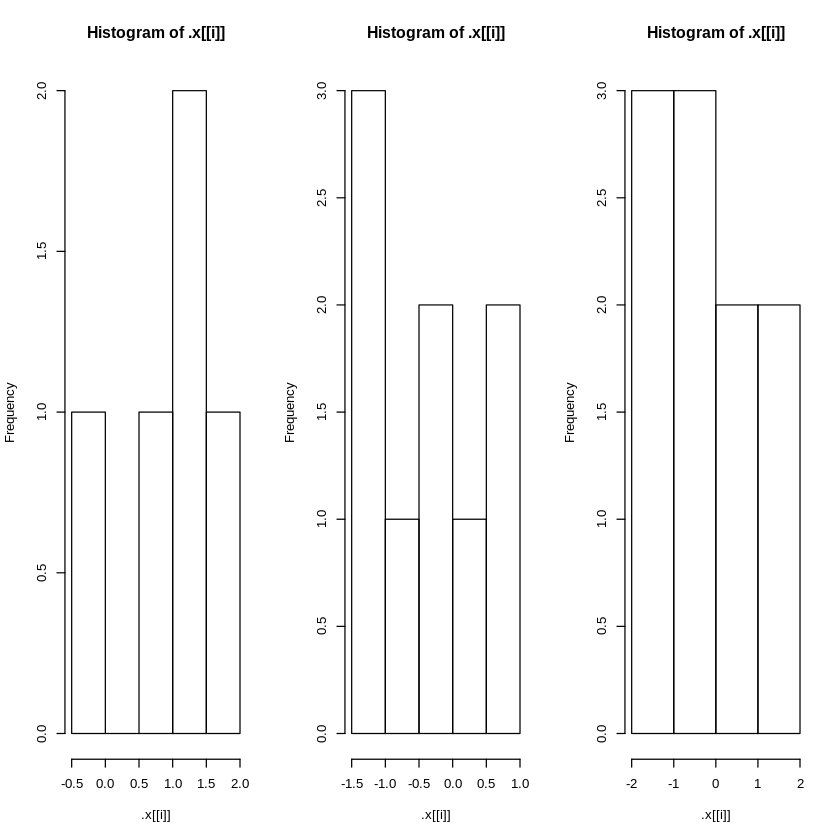

In [17]:
# using walk() to produce "side-effects" (i.e. non-values returned from functions)--
# in this case the "side-effects" are plots we want
# note that par(mfrow = c(1, 3)) splits plots into 1 row and three columns
par(mfrow = c(1, 3))
walk(listOfNumerics, hist)

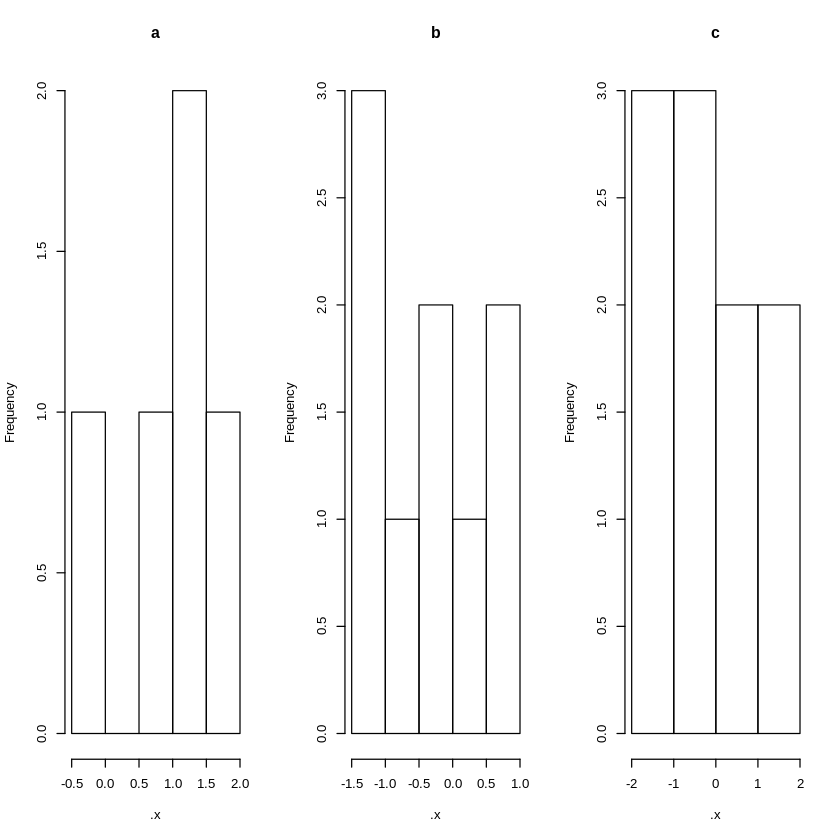

In [20]:
# iwalk() will allow for labeling of the plots by the element's index
# (e.g. "a", "b", "c" in these plots)
par(mfrow = c(1, 3))
iwalk(listOfNumerics, ~hist(.x, main = .y))

In [21]:
# using map2() to map over two lists at once
# here using multipliers to multiply each element in
# listOfNumerics by its respective element in multiplier
# lists need to be of same lengths it appears
multipliers <- list(0.5, 10, 3)
map2(.x = listOfNumerics, .y = multipliers, ~.x * .y)

$a
[1]  0.65989193  0.29276313  0.67408068 -0.05202348  0.83814305

$b
[1]  -4.518038   5.026298   6.660879  -1.513334   4.627314 -14.337304 -13.136965
[8]  -8.512747 -13.203468

$c
 [1] -3.2073879  4.4034450  5.3076950  1.4540777 -5.8941786 -0.3768256
 [7] -3.1509883  0.1013031 -1.2808871 -1.1857158

In [22]:
arguments <- expand.grid(n = c(100, 200),
                         mean = c(1, 10),
                         sd = c(1, 10))

In [23]:
arguments

n,mean,sd
<dbl>,<dbl>,<dbl>
100,1,1
200,1,1
100,10,1
200,10,1
100,1,10
200,1,10
100,10,10
200,10,10


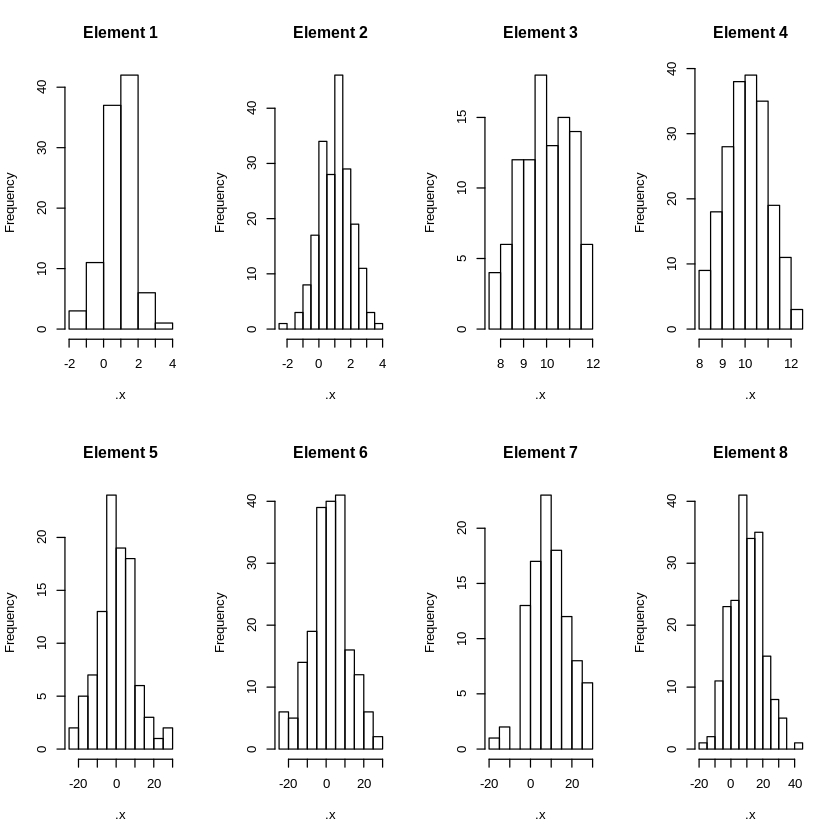

In [24]:
# use pmap() function to apply rnorm() function to rows of arguments data.frame
# to make 8 draws of size n (one per row of arguments) from normal dist with mean and sd
# specified by row of arguments
# Distribution of these draws are then piped to hist() for plotting with iwalk()
par(mfrow = c(2, 4))
pmap(arguments, rnorm) %>%
  iwalk(~hist(.x, main = paste("Element", .y)))